# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Milad Heidari
2.   Student Number: 98101469


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
#from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt
from tqdm.notebook import tqdm

from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

In [3]:
plays

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [4]:
artists

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte
...,...,...
17627,18741,Diamanda Galás
17628,18742,Aya RL
17629,18743,Coptic Rain
17630,18744,Oz Alchemist


# Preprocessing (20 pts)

In [5]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

ap = artists.merge(plays, how='right', left_on='id', right_on='artistID')
ap.sort_values(by=['id', 'userID'], ignore_index=True)

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [6]:
ap

,id,name,userID,artistID,weight
0,51,Duran Duran,2,51,13883
1,52,Morcheeba,2,52,11690
2,53,Air,2,53,11351
3,54,Hooverphonic,2,54,10300
4,55,Kylie Minogue,2,55,8983
...,...,...,...,...,...
92829,18726,Nyktalgia,2100,18726,337
92830,18727,Atsakau niekadA,2100,18727,297
92831,18728,Domantas Razauskas,2100,18728,281
92832,18729,Atalyja,2100,18729,280


In [7]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [8]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop(columns=['id'])
ap.reset_index()
ap

,name,userID,artistID,playCount
0,Duran Duran,2,51,13883
1,Morcheeba,2,52,11690
2,Air,2,53,11351
3,Hooverphonic,2,54,10300
4,Kylie Minogue,2,55,8983
...,...,...,...,...
92829,Nyktalgia,2100,18726,337
92830,Atsakau niekadA,2100,18727,297
92831,Domantas Razauskas,2100,18728,281
92832,Atalyja,2100,18729,280


In [9]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################


artist_rank = ap.groupby(by='name', as_index=True).aggregate({'userID': 'nunique', 'playCount': 'sum'})
artist_rank = artist_rank.rename(columns={'userID': 'totalUniqueUsers', 'playCount':'totalArtistPlays'})
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']
artist_rank.sort_values(by=['totalArtistPlays'], ascending=False, inplace=True);

In [10]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [11]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################



ap = ap.merge(artist_rank, how='inner', on='name')
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Duran Duran,2,51,13883,111,348919,3143.414414
1,Duran Duran,4,51,228,111,348919,3143.414414
2,Duran Duran,27,51,85,111,348919,3143.414414
3,Duran Duran,28,51,10,111,348919,3143.414414
4,Duran Duran,62,51,528,111,348919,3143.414414
...,...,...,...,...,...,...,...
92829,Nyktalgia,2100,18726,337,1,337,337.000000
92830,Atsakau niekadA,2100,18727,297,1,297,297.000000
92831,Domantas Razauskas,2100,18728,281,1,281,281.000000
92832,Atalyja,2100,18729,280,1,280,280.000000


In [12]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
0,Duran Duran,2,51,13883,111,348919,3143.414414
1,Duran Duran,4,51,228,111,348919,3143.414414
2,Duran Duran,27,51,85,111,348919,3143.414414
3,Duran Duran,28,51,10,111,348919,3143.414414
4,Duran Duran,62,51,528,111,348919,3143.414414
5,Duran Duran,63,51,563,111,348919,3143.414414
6,Duran Duran,66,51,910,111,348919,3143.414414
7,Duran Duran,73,51,1962,111,348919,3143.414414
8,Duran Duran,96,51,63,111,348919,3143.414414
9,Duran Duran,117,51,1244,111,348919,3143.414414


# Exploration

In [13]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x=x[:20], y=y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

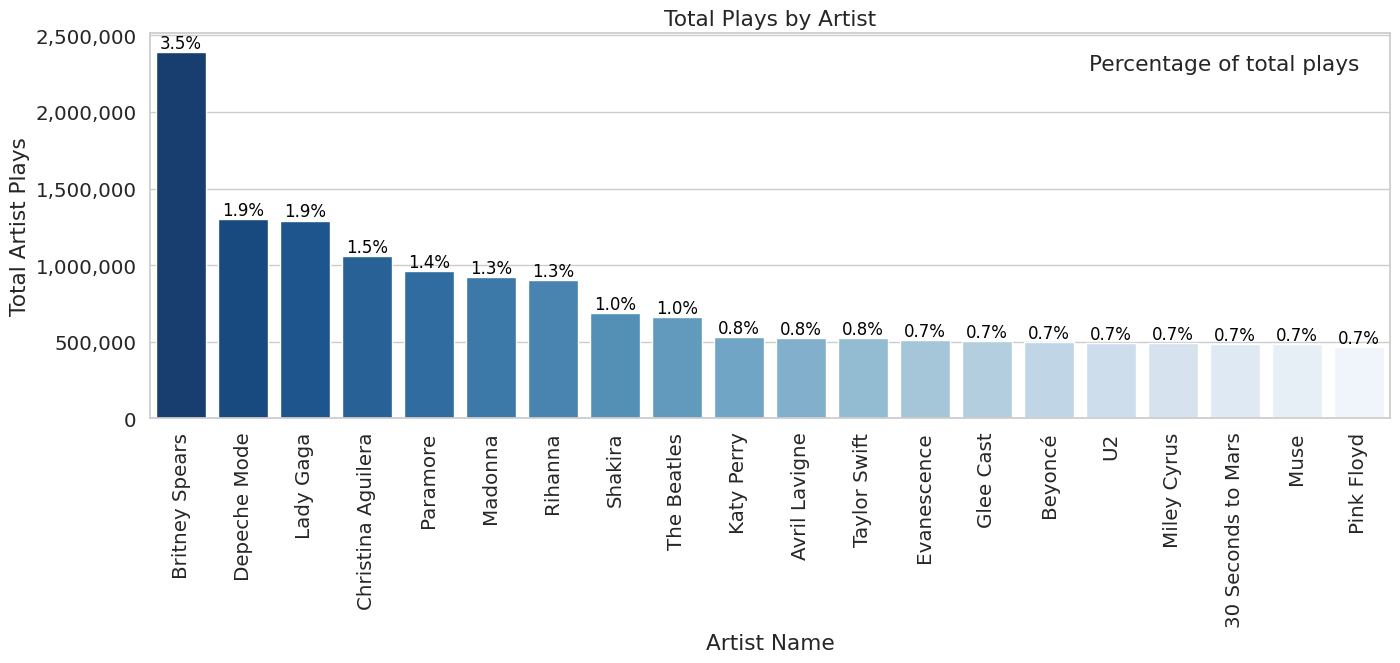

In [14]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

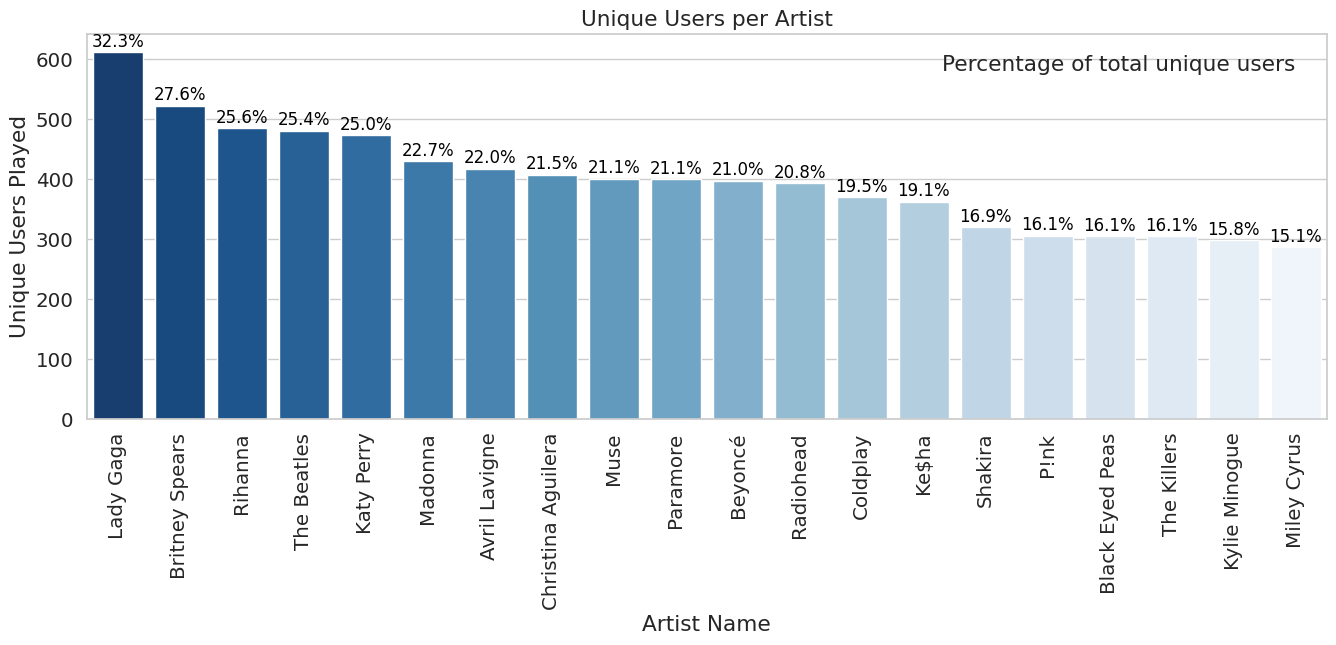

In [15]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

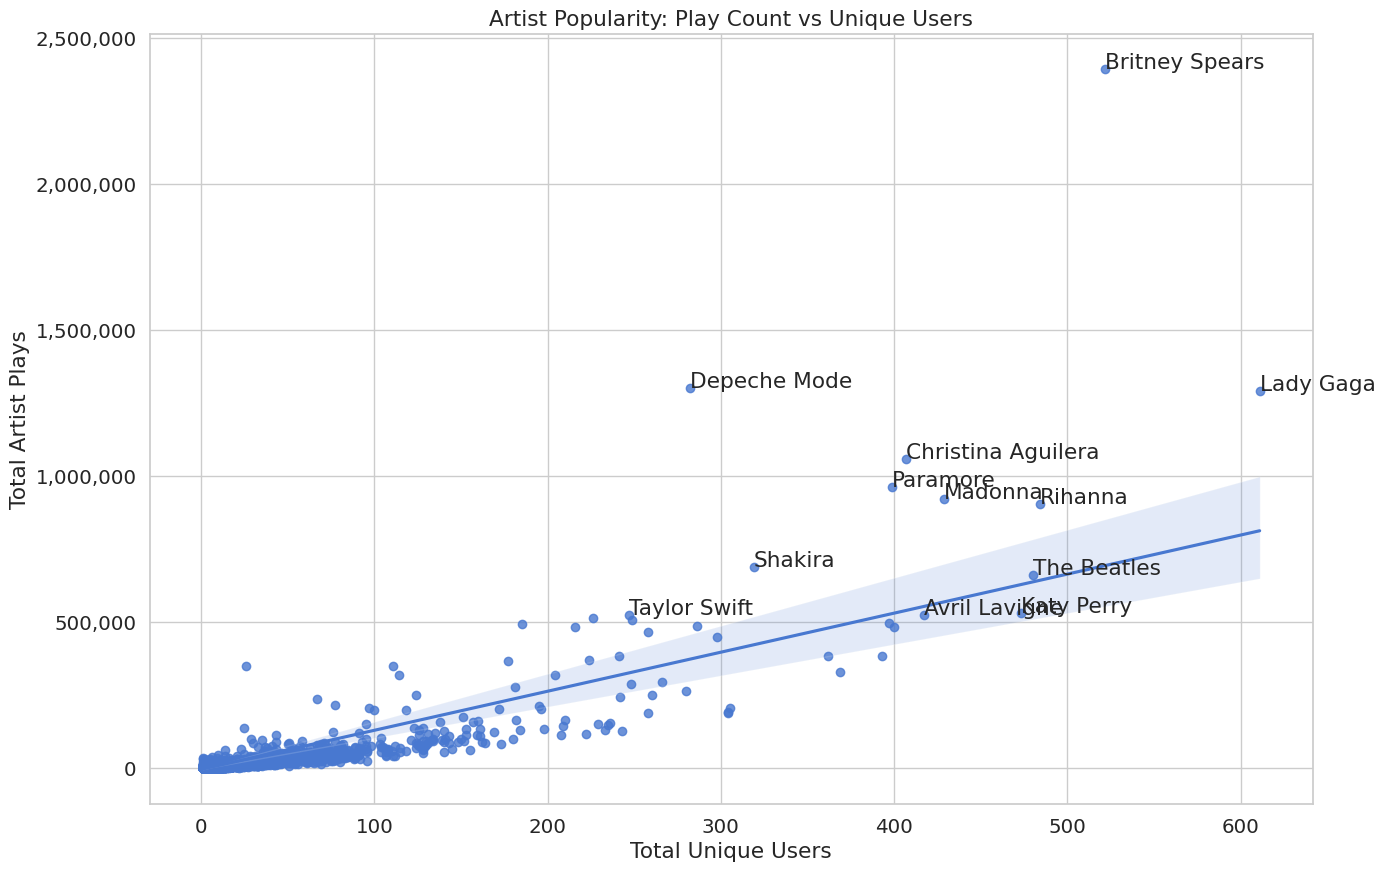

In [16]:
top_artists = artist_rank.sort_values(by='totalArtistPlays', ascending=False).iloc[:12, :].index
# TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank['totalUniqueUsers']
# TODO : "totalUniqueUsers" of "artist_rank"
y =  artist_rank['totalArtistPlays']
# TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index
# TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x=x,y=y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [17]:
pc = ap.playCount
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)
ap

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays,playCountScaled
0,Duran Duran,2,51,13883,111,348919,3143.414414,0.039360
1,Duran Duran,4,51,228,111,348919,3143.414414,0.000644
2,Duran Duran,27,51,85,111,348919,3143.414414,0.000238
3,Duran Duran,28,51,10,111,348919,3143.414414,0.000026
4,Duran Duran,62,51,528,111,348919,3143.414414,0.001494
...,...,...,...,...,...,...,...,...
92829,Nyktalgia,2100,18726,337,1,337,337.000000,0.000953
92830,Atsakau niekadA,2100,18727,297,1,297,297.000000,0.000839
92831,Domantas Razauskas,2100,18728,281,1,281,281.000000,0.000794
92832,Atalyja,2100,18729,280,1,280,280.000000,0.000791


In [18]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot(index='userID', columns='artistID', values='playCountScaled')

In [19]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################


ratings = ratings_df.fillna(0)

In [21]:
ratings

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2096,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2097,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code

print(f'{np.mean((ratings != 0).to_numpy()) * 100} % of the above dataframe is filled')

## END

0.2763750225421394 % of the above dataframe is filled


# Fitting(Training) Model (50pts)

In [23]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    
    train = ratings.to_numpy()
    validation = np.zeros(train.shape)
    
    idx_user = np.where(np.linalg.norm(train, ord=0, axis=1) >= MIN_USER_RATINGS)[0]
    
    for i in idx_user:
        idx_artist = np.where(train[i, :] != 0)[0]
        remove_idx = np.random.choice(idx_artist, DELETE_RATING_COUNT)
        validation[i, remove_idx] = train[i, remove_idx]
        train[i, remove_idx] = 0
    
    return train, validation

In [24]:
train, val = train_test_split(ratings)

In [25]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth != 0]
    ground_truth = ground_truth[ground_truth != 0]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [26]:
class Recommender:
  
    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
  
    def predictions(self, P, Q):
        return P.T @ Q
  
    def fit(self, X_train, X_val):
        nu, ni = X_train.shape
        P = np.random.randn(self.n_latent_features, nu)
        Q = np.random.randn(self.n_latent_features, ni)
        self.train_loss = []
        self.val_loss = []
        
        nonzero_idx = np.nonzero(X_train)
        
        for epoch in tqdm(range(self.n_epochs)):
            for u, i in zip(*nonzero_idx):
                e_ui = X_train[u, i] - np.dot(Q[:, i], P[:, u])
                Q[:, i] += self.learning_rate * (e_ui*P[:, u] - self.lmbda*Q[:, i])
                P[:, u] += self.learning_rate * (e_ui*Q[:, i] - self.lmbda*P[:, u])
                
            my_predictions = self.predictions(P, Q)
            self.train_loss.append(rmse(my_predictions, X_train))
            self.val_loss.append(rmse(my_predictions, X_val))
        
        self.optimal_P = P
        self.optimal_Q = Q
        
        return self

    def predict(self, X_train, user_index):
        predict_user = self.optimal_Q.T @ self.optimal_P[:, user_index]
        predict_user = predict_user[X_train[user_index, :] == 0]
        #predict_user = predict_user.flatten()
        #predict_user[X_train[user_index, :] != 0] = X_train[user_index, X_train[user_index, :] != 0]
        return predict_user

In [27]:
#creating recommender object
recommender = Recommender(n_epochs=200, n_latent_features=10, lmbda=0.05, learning_rate=0.01).fit(train, val)

  0%|          | 0/200 [00:00<?, ?it/s]

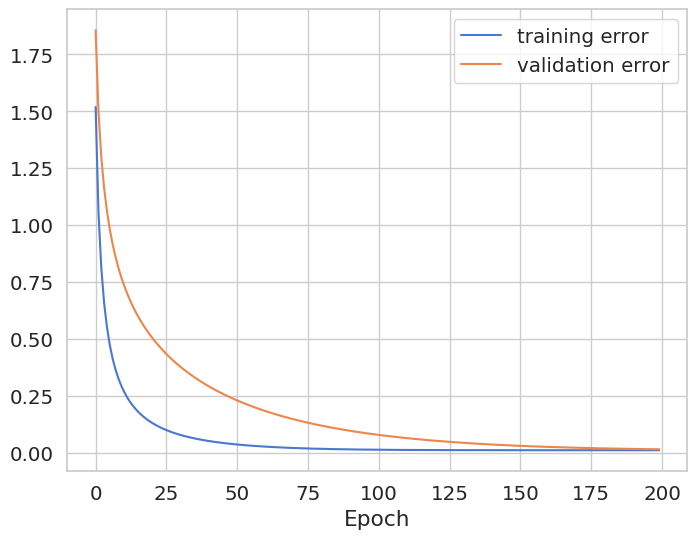

In [35]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(recommender.n_epochs), recommender.train_loss, label='training error')
ax.plot(range(recommender.n_epochs), recommender.val_loss, label='validation error')
ax.set_xlabel('Epoch')
plt.legend();

In [36]:
recommender.train_loss[-1], recommender.val_loss[-1]

(0.010928776549991605, 0.015140969728568944)

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [30]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]
rating_predictions = recommender.predict(train, user_index)

In [31]:
def create_artist_ratings(artists_df, artists_index, ratings, n=100):
    artist_ids = ratings_df.columns[artists_index]
    artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
    top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
    
    artist_recommendations = artists_df.merge(top_n_artists, how='right', right_on='artistId', left_on='id')
    artist_recommendations.drop(columns=['artistId'], inplace=True)
    return artist_recommendations.sort_values("rating", ascending=False)

In [37]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

,id,name,rating
0,614,Pearl Jam,0.196486
1,1131,Tool,0.052734
2,2172,Gojira,0.042016
3,2479,Twiztid,0.029742
4,1118,A Perfect Circle,0.025657
5,978,Disturbed,0.021690
6,6257,Rob Zombie,0.021562
7,6618,D12,0.016280
8,472,3 Doors Down,0.010990
9,2474,Insane Clown Posse,0.010627


In [38]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

,id,name,rating
0,5959,Jessie Malakouti,0.034772
1,16804,Rihanna-remixado REnan,0.034756
2,11396,Luke Pickett,0.034166
3,553,The Staggers,0.033552
4,13774,Moth Feat. Engeline,0.033473
...,...,...,...
95,14061,Hellyeah,0.024947
96,14024,Liz Carroll,0.024923
97,16264,The Charlottes,0.024898
98,18126,H16,0.024876


# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**